# Machine Learning
## Student: Vasquez Espinoza, Luis
## Exercise 2
### Midterm exam
___
### Using _Auto_ dataset

#### **7.a. Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.**

In [1]:
import pandas as pd

file_path = 'Auto.csv'
auto_df = pd.read_csv(file_path)
auto_df = auto_df.loc[:,auto_df.columns != 'Unnamed: 0']
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [2]:
auto_df['mpg01'] = auto_df['mpg'].apply(lambda x: 1 if x > auto_df['mpg'].median() else 0)
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


#### **7.b. Fit a support vector classiﬁer to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.**

Again, as the first item of the exam, I'll use the selected features to create the training and testing data

In [3]:
auto_useful_df = auto_df.loc[:,['cylinders', 'weight', 'displacement', 'mpg01']]
auto_useful_df
x = auto_useful_df.loc[:,auto_useful_df.columns != 'mpg01']
y = auto_useful_df.loc[:,'mpg01']

Using sklearn's Suport Vector Classifier, I'll variate the cost value in a logarithmic-admisible range in order to adjust to the theory behind the model. The tool for cross validation will take a range of $C$ values for the cost and find the optim. configuration

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

parameters = {'C': np.linspace(0.01, 100, 20)}

svc = SVC()
clf = GridSearchCV(svc, parameters, cv=5, verbose=1)

clf.fit(x, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e-02, 5.27263158e+...2632e+01, 1.57978947e+01,
       2.10605263e+01, 2.63231579e+01, 3.15857895e+01, 3.68484211e+01,
       4.21110526e+01, 4.73736842e+01, 5.26363158e+01, 5.78989474e+01,
       6.31615789e+01, 6.84242105e+01, 7.36868421e+01, 7.89494737e+01,
       8.42121053e+01, 8.94747368e+01, 9.47373684e+01, 1.00000000e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

And the gridsearch results are shown in the next dataframe:

In [5]:
cv_search1_df = pd.DataFrame(clf.cv_results_).sort_values(by='mean_test_score', ascending=False)
cv_search1_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,0.006207,0.001012,0.001915,0.000523,52.6363,{'C': 52.63631578947368},0.5875,0.589744,0.628205,0.589744,0.538462,0.586735,0.028454,1
1,0.005774,0.000247,0.001547,0.000071,5.27263,{'C': 5.272631578947368},0.5875,0.589744,0.628205,0.589744,0.538462,0.586735,0.028454,1
18,0.005796,0.000498,0.001537,0.000097,94.7374,{'C': 94.73736842105264},0.5875,0.589744,0.628205,0.589744,0.538462,0.586735,0.028454,1
17,0.005612,0.000344,0.001517,0.000075,89.4747,{'C': 89.47473684210526},0.5875,0.589744,0.628205,0.589744,0.538462,0.586735,0.028454,1
16,0.005392,0.000119,0.001474,0.000040,84.2121,{'C': 84.2121052631579},0.5875,0.589744,0.628205,0.589744,0.538462,0.586735,0.028454,1
15,0.005676,0.000205,0.001545,0.000060,78.9495,{'C': 78.94947368421053},0.5875,0.589744,0.628205,0.589744,0.538462,0.586735,0.028454,1
14,0.006566,0.000781,0.001857,0.000300,73.6868,{'C': 73.68684210526315},0.5875,0.589744,0.628205,0.589744,0.538462,0.586735,0.028454,1
13,0.009084,0.001735,0.002555,0.000649,68.4242,{'C': 68.42421052631579},0.5875,0.589744,0.628205,0.589744,0.538462,0.586735,0.028454,1
12,0.006382,0.000682,0.001855,0.000194,63.1616,{'C': 63.16157894736842},0.5875,0.589744,0.628205,0.589744,0.538462,0.586735,0.028454,1
11,0.006835,0.001486,0.002176,0.000631,57.8989,{'C': 57.89894736842105},0.5875,0.589744,0.628205,0.589744,0.538462,0.586735,0.028454,1


From here, to report the mean errors for each test in the CV, lets substract 100% from the mean accuracy of each search: 

In [6]:
errors = list(1 - cv_search1_df['mean_test_score'])
config = list(cv_search1_df['params'])

print("C\t\t\tERROR")
for p, err in zip(errors, config):
    print("*"*35)
    print("C={}\t{}".format(err['C'],p))

C			ERROR
***********************************
C=52.63631578947368	0.41326530612244894
***********************************
C=5.272631578947368	0.41326530612244894
***********************************
C=94.73736842105264	0.41326530612244894
***********************************
C=89.47473684210526	0.41326530612244894
***********************************
C=84.2121052631579	0.41326530612244894
***********************************
C=78.94947368421053	0.41326530612244894
***********************************
C=73.68684210526315	0.41326530612244894
***********************************
C=68.42421052631579	0.41326530612244894
***********************************
C=63.16157894736842	0.41326530612244894
***********************************
C=57.89894736842105	0.41326530612244894
***********************************
C=100.0	0.41326530612244894
***********************************
C=47.373684210526314	0.41326530612244894
***********************************
C=42.11105263157894	0.41326530612244894
**************

In [7]:
cv_search1_df.iloc[0,:]

mean_fit_time                      0.00620708
std_fit_time                       0.00101173
mean_score_time                    0.00191483
std_score_time                    0.000522794
param_C                               52.6363
params               {'C': 52.63631578947368}
split0_test_score                      0.5875
split1_test_score                    0.589744
split2_test_score                    0.628205
split3_test_score                    0.589744
split4_test_score                    0.538462
mean_test_score                      0.586735
std_test_score                      0.0284536
rank_test_score                             1
Name: 10, dtype: object

It seems that for this first case the optim classifier is created for $C = 52.60$, resulting in a mean score of $0.58$. Im not that quite satisfied with this result, so in order to improve the outcome I tried normalizing the data before the training:

In [8]:
x = preprocessing.scale(x)
y = preprocessing.scale(y)

svc = SVC()
clf = GridSearchCV(svc, parameters, cv=5, verbose=1)

clf.fit(x, y)
cv_search2_df = pd.DataFrame(clf.cv_results_).sort_values(by='mean_test_score', ascending=False)
cv_search2_df

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.002691,0.000522,0.000452,0.000043,10.5353,{'C': 10.535263157894736},0.95,0.935897,0.871795,0.910256,0.871795,0.908163,0.032210,1
3,0.003352,0.000849,0.000459,0.000056,15.7979,{'C': 15.797894736842105},0.95,0.935897,0.871795,0.910256,0.871795,0.908163,0.032210,1
4,0.003656,0.001235,0.000461,0.000060,21.0605,{'C': 21.060526315789474},0.95,0.935897,0.858974,0.910256,0.871795,0.905612,0.035345,3
5,0.003520,0.001179,0.000460,0.000051,26.3232,{'C': 26.32315789473684},0.95,0.935897,0.858974,0.910256,0.871795,0.905612,0.035345,3
6,0.003183,0.000818,0.000388,0.000025,31.5858,{'C': 31.585789473684212},0.95,0.935897,0.858974,0.910256,0.871795,0.905612,0.035345,3
0,0.004177,0.001752,0.000926,0.000237,0.01,{'C': 0.01},0.95,0.923077,0.846154,0.910256,0.884615,0.903061,0.035380,6
7,0.003373,0.000957,0.000399,0.000026,36.8484,{'C': 36.84842105263157},0.95,0.935897,0.846154,0.910256,0.871795,0.903061,0.038902,6
1,0.002219,0.000296,0.000455,0.000063,5.27263,{'C': 5.272631578947368},0.95,0.923077,0.846154,0.910256,0.871795,0.900510,0.037041,8
11,0.003625,0.001008,0.000467,0.000110,57.8989,{'C': 57.89894736842105},0.95,0.935897,0.833333,0.897436,0.871795,0.897959,0.042502,9
10,0.003571,0.001078,0.000386,0.000012,52.6363,{'C': 52.63631578947368},0.95,0.935897,0.833333,0.897436,0.871795,0.897959,0.042502,9


And again, getting the errors per search:

In [9]:
errors = list(1 - cv_search2_df['mean_test_score'])
config = list(cv_search2_df['params'])

print("C\t\t\tERROR")
for p, err in zip(errors, config):
    print("*"*35)
    print("C={}\t{}".format(err['C'],p))

C			ERROR
***********************************
C=10.535263157894736	0.09183673469387754
***********************************
C=15.797894736842105	0.09183673469387754
***********************************
C=21.060526315789474	0.09438775510204078
***********************************
C=26.32315789473684	0.09438775510204078
***********************************
C=31.585789473684212	0.09438775510204078
***********************************
C=0.01	0.09693877551020413
***********************************
C=36.84842105263157	0.09693877551020413
***********************************
C=5.272631578947368	0.09948979591836737
***********************************
C=57.89894736842105	0.10204081632653061
***********************************
C=52.63631578947368	0.10204081632653061
***********************************
C=47.373684210526314	0.10204081632653061
***********************************
C=42.11105263157894	0.10204081632653061
***********************************
C=63.16157894736842	0.10459183673469385
**********

In [10]:
cv_search2_df.iloc[0]

mean_fit_time                       0.00269117
std_fit_time                       0.000521676
mean_score_time                    0.000451994
std_score_time                     4.26329e-05
param_C                                10.5353
params               {'C': 10.535263157894736}
split0_test_score                         0.95
split1_test_score                     0.935897
split2_test_score                     0.871795
split3_test_score                     0.910256
split4_test_score                     0.871795
mean_test_score                       0.908163
std_test_score                       0.0322102
rank_test_score                              1
Name: 2, dtype: object

Now we get a descent result on the supor vectors for this particular transformation on the dataset. Not only the **mean test score** rises to a 90%, but also the optim value is found way quicker ($C = 10.5$)

#### **7.c Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with diﬀerent values of gamma and degree and cost. Comment on your results.**

Using the now normalized data in a bigger and more robust CV:

In [11]:
params = {
    "C": np.linspace(0.01, 100, 10),
    "gamma": [0.001, 0.01, 0.1, 1],
    "kernel": ['rbf', 'poly'],
    "degree": [1, 3, 5, 7]
}
clf = GridSearchCV(SVC(), param_grid=params, cv=3, scoring='accuracy',
                   return_train_score=True, verbose=1, n_jobs=-1)
clf.fit(x, y)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   30.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.000e-02, 1.112e+01, 2.223e+01, 3.334e+01, 4.445e+01, 5.556e+01,
       6.667e+01, 7.778e+01, 8.889e+01, 1.000e+02]),
                         'degree': [1, 3, 5, 7], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [12]:
cv_search3_df = pd.DataFrame(clf.cv_results_).sort_values(by='mean_test_score', ascending=False)
cv_search3_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
7,0.001817,0.000015,0.001613,0.000514,0.01,1,1,poly,"{'C': 0.01, 'degree': 1, 'gamma': 1, 'kernel':...",0.924242,0.900000,0.900000,0.908163,0.011457,1,0.884615,0.896947,0.904580,0.895381,0.008225
260,0.004813,0.000941,0.000733,0.000030,88.89,1,0.1,rbf,"{'C': 88.89, 'degree': 1, 'gamma': 0.1, 'kerne...",0.924242,0.915385,0.876923,0.905612,0.020531,2,0.892308,0.904580,0.923664,0.906851,0.012901
268,0.005592,0.001192,0.000638,0.000034,88.89,3,0.1,rbf,"{'C': 88.89, 'degree': 3, 'gamma': 0.1, 'kerne...",0.924242,0.915385,0.876923,0.905612,0.020531,2,0.892308,0.904580,0.923664,0.906851,0.012901
236,0.003907,0.001013,0.000619,0.000022,77.78,3,0.1,rbf,"{'C': 77.78, 'degree': 3, 'gamma': 0.1, 'kerne...",0.924242,0.915385,0.876923,0.905612,0.020531,2,0.892308,0.900763,0.923664,0.905578,0.013246
284,0.004869,0.000973,0.000797,0.000061,88.89,7,0.1,rbf,"{'C': 88.89, 'degree': 7, 'gamma': 0.1, 'kerne...",0.924242,0.915385,0.876923,0.905612,0.020531,2,0.892308,0.904580,0.923664,0.906851,0.012901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,0.002553,0.000007,0.001143,0.000012,0.01,7,0.01,poly,"{'C': 0.01, 'degree': 7, 'gamma': 0.01, 'kerne...",0.515152,0.530769,0.500000,0.515306,0.012530,301,0.515385,0.526718,0.519084,0.520395,0.004719
29,0.002616,0.000041,0.001246,0.000178,0.01,7,0.1,poly,"{'C': 0.01, 'degree': 7, 'gamma': 0.1, 'kernel...",0.515152,0.530769,0.500000,0.515306,0.012530,301,0.515385,0.526718,0.519084,0.520395,0.004719
57,0.002687,0.000214,0.001194,0.000157,11.12,7,0.001,poly,"{'C': 11.12, 'degree': 7, 'gamma': 0.001, 'ker...",0.515152,0.530769,0.500000,0.515306,0.012530,301,0.515385,0.526718,0.519084,0.520395,0.004719
281,0.002875,0.000020,0.001221,0.000007,88.89,7,0.001,poly,"{'C': 88.89, 'degree': 7, 'gamma': 0.001, 'ker...",0.515152,0.530769,0.500000,0.515306,0.012530,301,0.515385,0.526718,0.519084,0.520395,0.004719


In [13]:
print("Score:",cv_search3_df.iloc[0]['mean_test_score'])
print("Optim. params:", cv_search3_df.iloc[0]['params'])

Score: 0.9081632653061225
Optim. params: {'C': 0.01, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}


Finally, after de CV search, we get that the presicion for this model gets an score of 90.8%, having the best results using the polynomial kernel.

#### **7.d Make some plots to back up your assertions in (b) and (c). Hint: In the lab, we used the plot() function for svm objects only in cases with p = 2. When p > 2, you can use the plot() function to create plots displaying pairs of variables at a time. Essentially, instead of typing**

> plot ( svmfit , dat ) 

**where svmfit contains your ﬁtted model and dat is a data frame containing your data, you can type**

> plot ( svmfit , dat , x1∼x4 )

**in order to plot just the ﬁrst and fourth variables. However, you must replace x1 and x4 with the correct variable names. To ﬁnd out more, type ?plot.svm.**

This is kind of an open question, but just to ilustrate the decision of features, Ill show the dependency of this used features with the target value _mpg01_

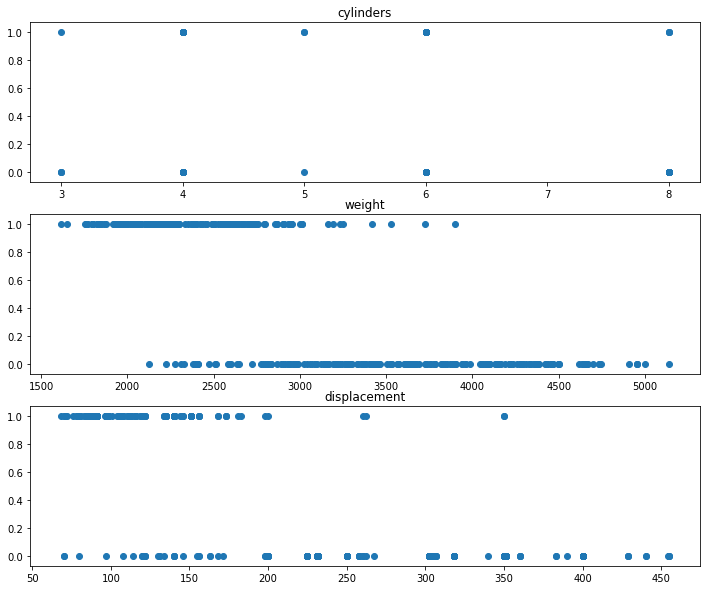

In [14]:
fig_scatter, axs = plt.subplots(3,1, figsize=(12,10))
features_to_plot = ['cylinders', 'weight', 'displacement']

for feature, ax in zip(features_to_plot, axs.flatten()):
    ax.scatter(auto_df[feature], auto_df['mpg01'])
    ax.set_title(feature)
    
plt.show()

From this the conclusion to be made is that, even with features that have been already proven to be good for the sake of the model, sometimes the nomralization of this attributes optimize the search of a set of parameter that generate the model quicker, resulting in a more robust solution.